# 탐색적 분석

- 탐색적 분석(exploratory data analysis: EDA)이란 본격적인 데이터 분석을 수행하기에 앞서 **데이터의 전체적인 특성을 살펴보는 것**
- 수집한 데이터가 분석에 적절한지 알아보는 과정
- 데이터가 통계적인 가정을 만족하고 있는지를 확인한다 (분포가 골고루 있는지 등)

- 데이터 전처리를 같이 수행하기도 한다
 - 데이터 클리닝 - 결측치 처리, 틀린값 처리
 - 스케일링 - 여러 변수 값의 범위를 동등한 조건으로 맞추는 것: 표준 스케일링, min-max 스케일링
 - 이상치 처리 - 이상치 탐지 및 제거
 - 데이터 변환 - 로그 변환, 카테고리 인코딩 등

## 주택가격 데이터 탐색

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [3]:
# 주택가격 데이터 다운로드
data = pd.read_csv("https://github.com/data-labs/data/raw/main/house_train.csv")

In [4]:
df = data.copy()

In [5]:
df.shape

(1460, 81)

In [6]:
df[:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 특성 설명


- SalePrice: 판매가격(달러), 목적변수
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

## 목적 변수/Target Variable

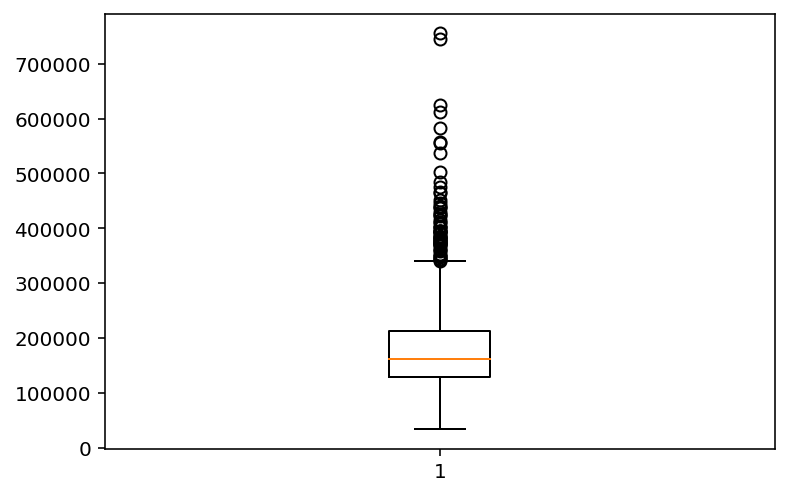

In [8]:
#Using boxplot
plt.boxplot(df['SalePrice']); plt.show()

In [9]:
#기초 통계값
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

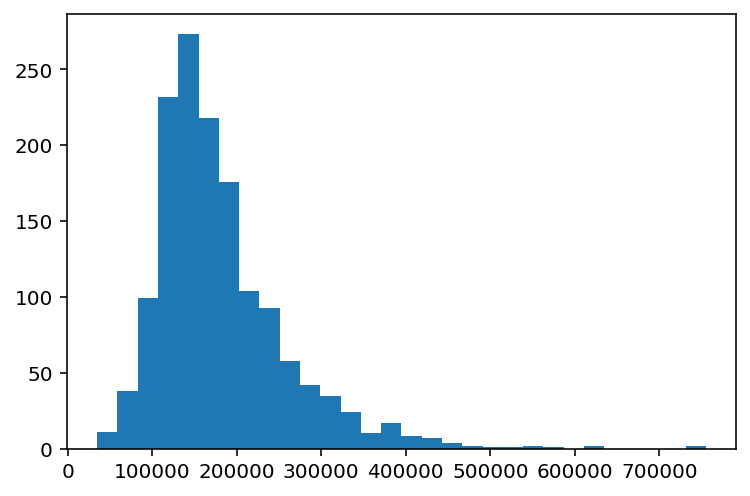

In [10]:
#histogram
plt.hist(df['SalePrice'], bins=30); plt.show()

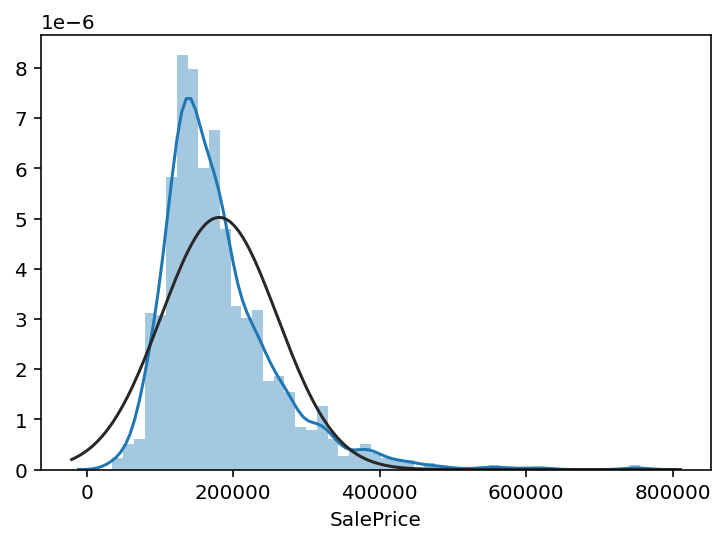

In [11]:
# 확률 분포 보기, 가장 가까운 정규 분포와 비교
sns.distplot(df["SalePrice"], fit=norm)
#Fit=norm이란 가장 가까운 normal distribution이랑 비교해서 그려봐라
#주어진 데이터가 정규분포랑 비슷한가 확인

## 정규분포와 가까운가?
- 데이터가 정규분포를 따르면 평균값, 분산 등을 예측하는 것이 수월하다
- skewness (왜도: 대칭성) 
- kurtosis (첨도: 끝부분의 모양)
 - 이 값들이 0에 가까울수록 정규분포와 유사하다

In [12]:
print("Skewness:",df['SalePrice'].skew())
print("Kurtosis:",df['SalePrice'].kurtosis())

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


Skewness: -0.23210336683941582
Kurtosis: 0.20726484113381982


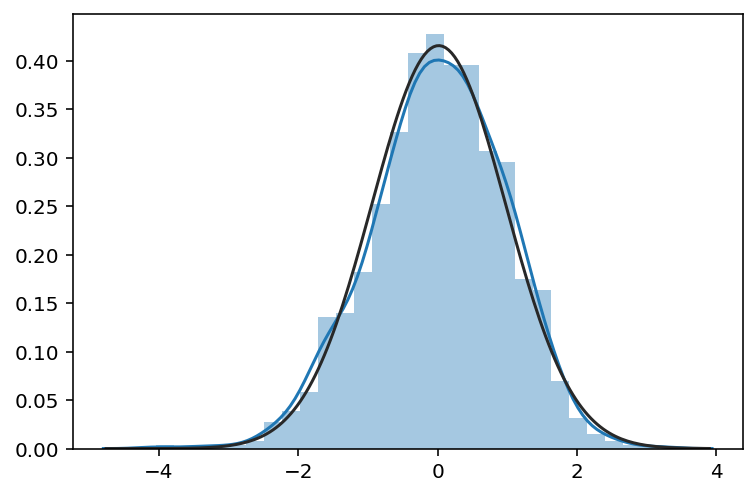

In [13]:
# 실제 정규분포의 경우 왜도와 첨도 보기
N=1000
x = np.random.randn(N)
sns.distplot(x,fit=norm)
print("Skewness:", stats.skew(x))
print("Kurtosis:", stats.kurtosis(x))

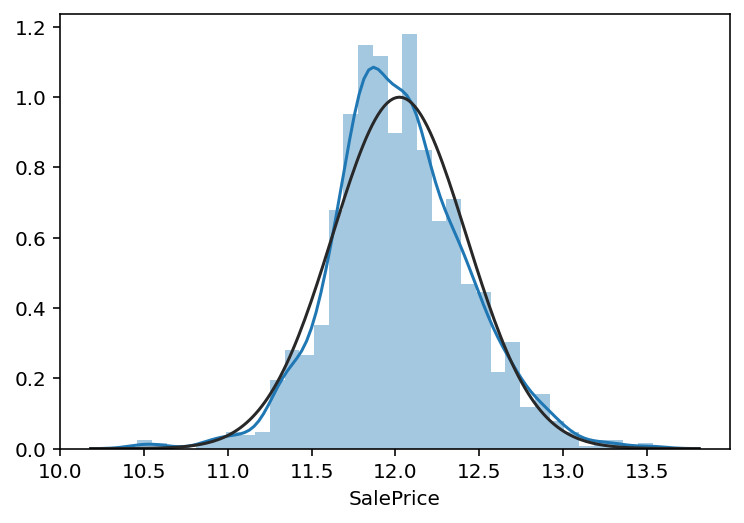

In [14]:
# 목적 변수가 돈과 관련된 값이므로 로그를 취해본다
sns.distplot(np.log(df['SalePrice']),fit=norm);

## 목적 변수가 돈과 관련된 값이므로 로그를 취해본다!!

In [15]:
# 로그를 취한 경우 왜도와 첨도 확인
print("Skewness: ", np.log(df['SalePrice']).skew())
print("Kurtosis: ",np.log(df['SalePrice']).kurtosis())

Skewness:  0.12133506220520406
Kurtosis:  0.8095319958036296


## 목적 변수와 입력 특성들의 상관계수(Correlation Coefficient)
- 데이터 분석은 입력 변수를 사용하여 목적 변수를 예측하는 작업이다
- 각 입력 변수와 목적 변수 사이의 상관계수를 보면 데이터의 연관성을 파악하는데 도움이 된다


- 입력 변수(input)의 다른 이름 **(X)**
 - 특성 (features)
 - 설명 변수 (explanatory variable)
 - 독립 변수 (independent variable)
- 목적 변수(target variable) 의 다른 이름 **(y)**
 - 레이블 (label)
 - 출력 변수 (output)
 - 종속 변수 (dependent variable)

### 히트맵

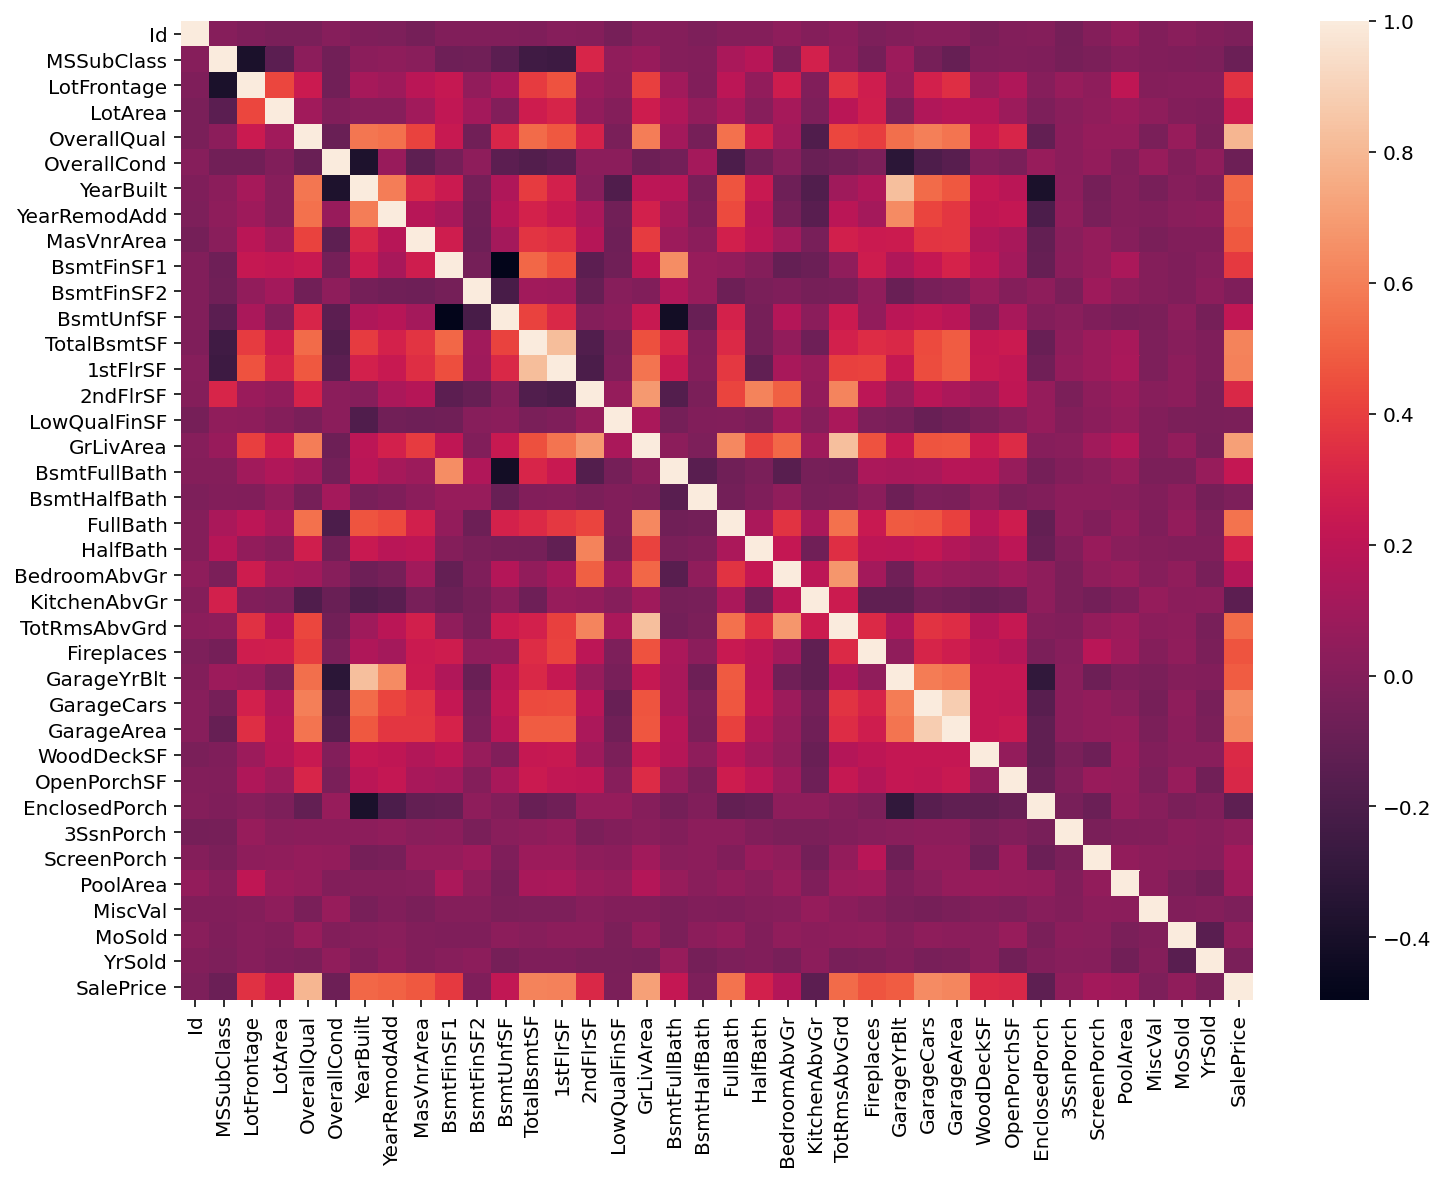

In [16]:
# 데이터프레임 중 모든 "수치" 데이터 사이의 상관계수 매트릭스를 구한다
corrmat = df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corrmat)

**independent variable(input)이랑 Correlation coefficent들의 큰 특성들을 찾는다.**

In [19]:
corrmat[-5:]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
PoolArea,0.057044,0.008283,0.206167,0.077672,0.065166,-0.001985,0.004950,0.005829,0.011723,0.140491,...,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.029669,-0.033737,-0.059689,0.092404
MiscVal,-0.006242,-0.007683,0.003368,0.038068,-0.031406,0.068777,-0.034383,-0.010286,-0.029815,0.003571,...,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
MoSold,0.021172,-0.013585,0.011200,0.001205,0.070815,-0.003511,0.012398,0.021490,-0.005965,-0.015727,...,0.021011,0.071255,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.046432
YrSold,0.000712,-0.021407,0.007450,-0.014261,-0.027347,0.043950,-0.013618,0.035743,-0.008201,0.014359,...,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


In [20]:
corrmat.shape 
#categorical은 계산이안됌

(38, 38)

In [21]:
df_sort = corrmat['SalePrice'].to_frame().sort_values(by='SalePrice', ascending=False)
#to_frame -> dataframe에 넣고 sort 한다 sale price기준으로
df_sort[:10]

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [22]:
df_sort[-10:]


,SalePrice
BsmtFinSF2,-0.011378
BsmtHalfBath,-0.016844
MiscVal,-0.021190
Id,-0.021917
LowQualFinSF,-0.025606
YrSold,-0.028923
OverallCond,-0.077856
MSSubClass,-0.084284
EnclosedPorch,-0.128578
KitchenAbvGr,-0.135907


- -값들은 집값을 좀 떨군다는 예측을 할수있겠다. -값이 높은거도 눈여겨본다.

In [23]:
# 상관계수가 큰 상위 10의 특성을 선택하여 주로 보겠다
# 주의: 상관계수가 "음수"로 큰 것도 확인해봐야 한다 (반대 영향을 주는 특성임)
cols = df_sort.index[:10]
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

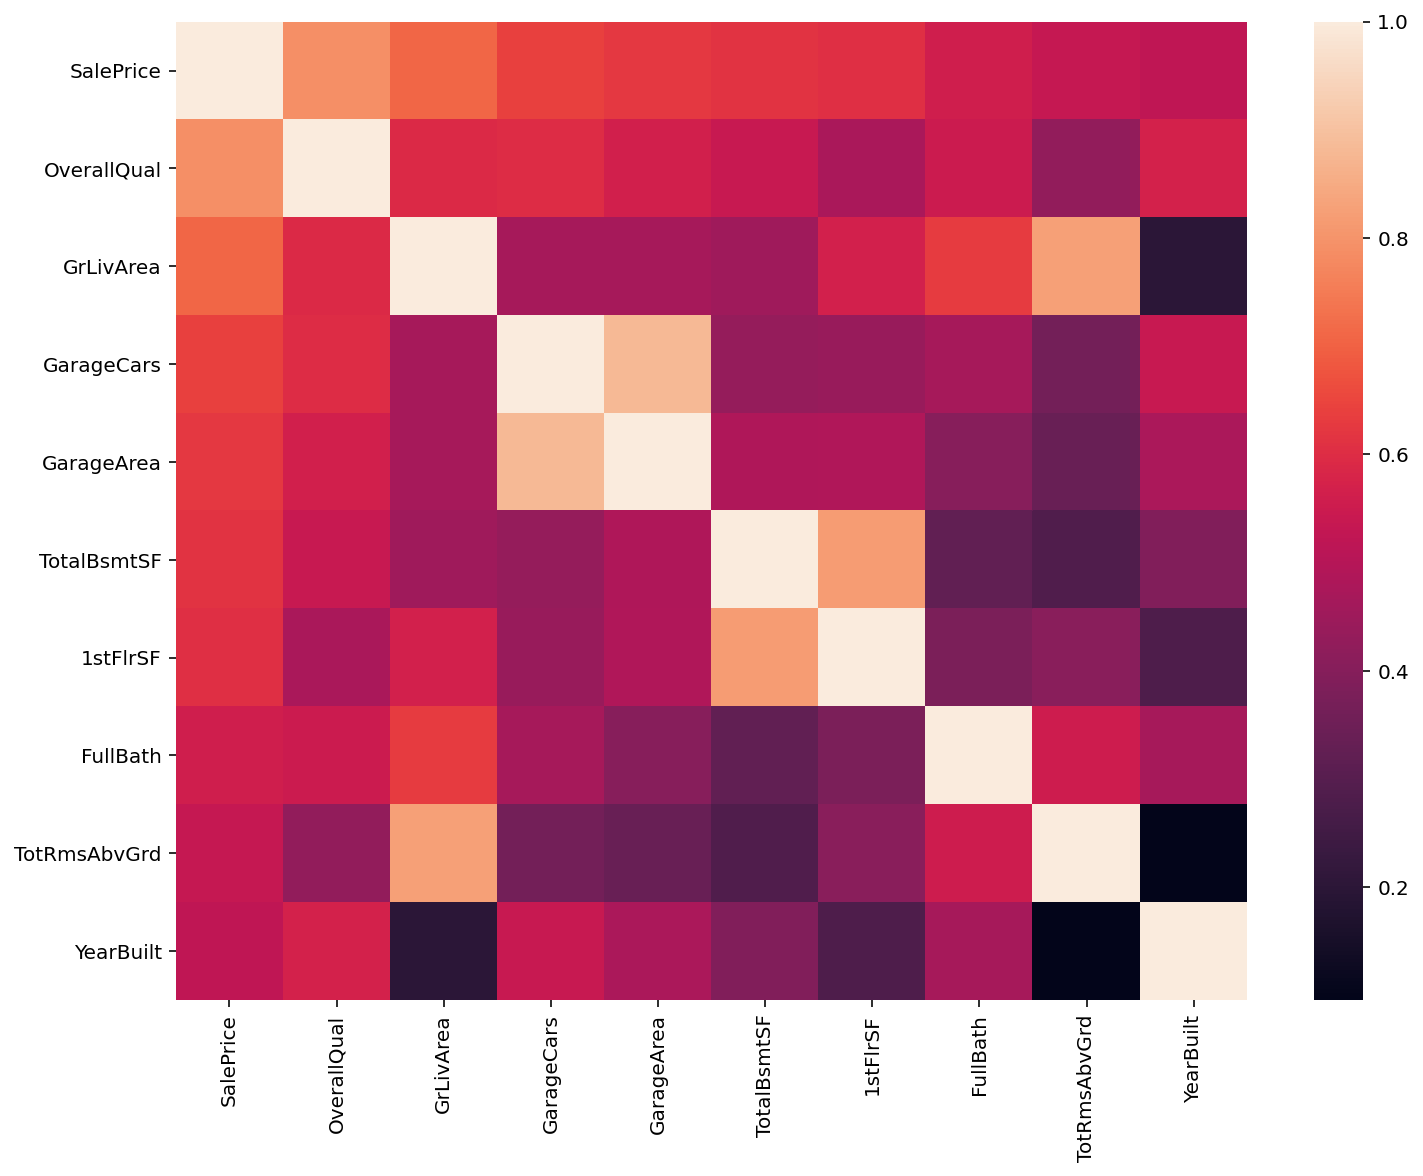

In [25]:
#10개 특성에 대해서만 상관계수를 구한다
corrmat_10 = df[cols].corr()
plt.figure(figsize=(12,9))
sns.heatmap(corrmat_10)

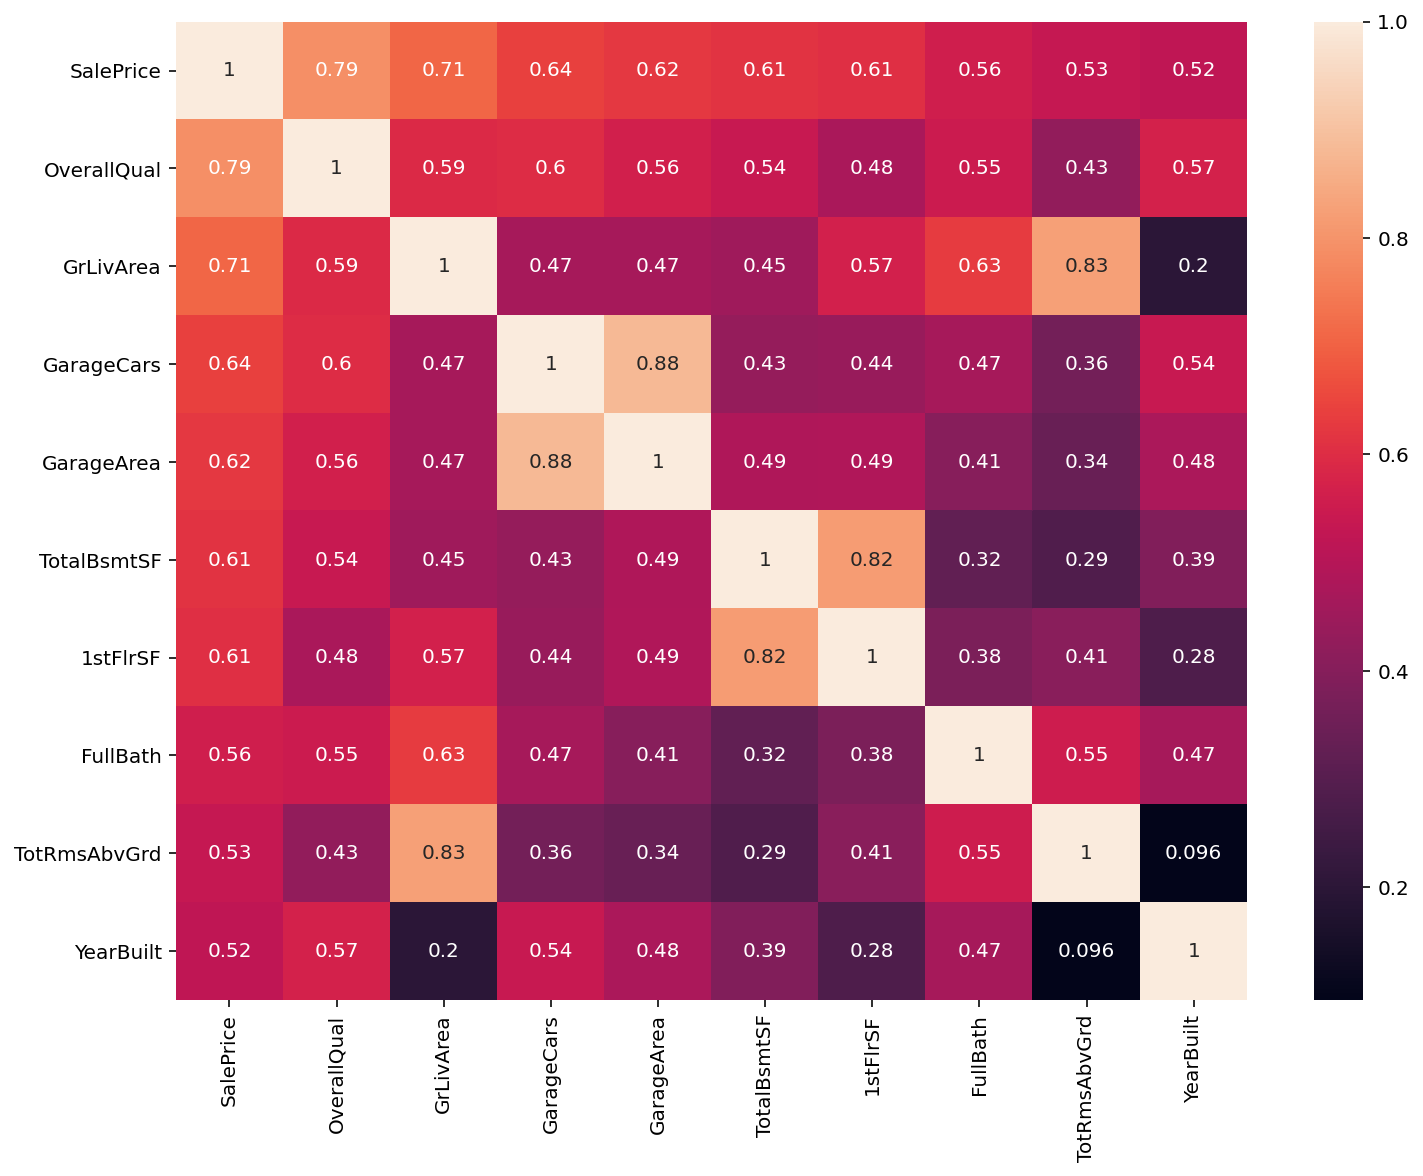

In [27]:
# 히트맵에 숫자 값을 표시하기
plt.figure(figsize=(12, 9))
corrmat_10 = np.corrcoef(df[cols].values.T)
sns.heatmap(corrmat_10, annot=True,  yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* 'GarageCars'와 'GarageArea' 특성은 상관계수가 크므로(0.88) 같은 의미를 갖는 것으로 보인다 - 하나는 생략 가능할 것이다
* 'TotalBsmtSF'와 '1stFloor'도 상관계수가 크다 (0.82)
* 'TotRmsAbvGrd'와 'GrLivArea' 도 상관계수가 크다(0.83)

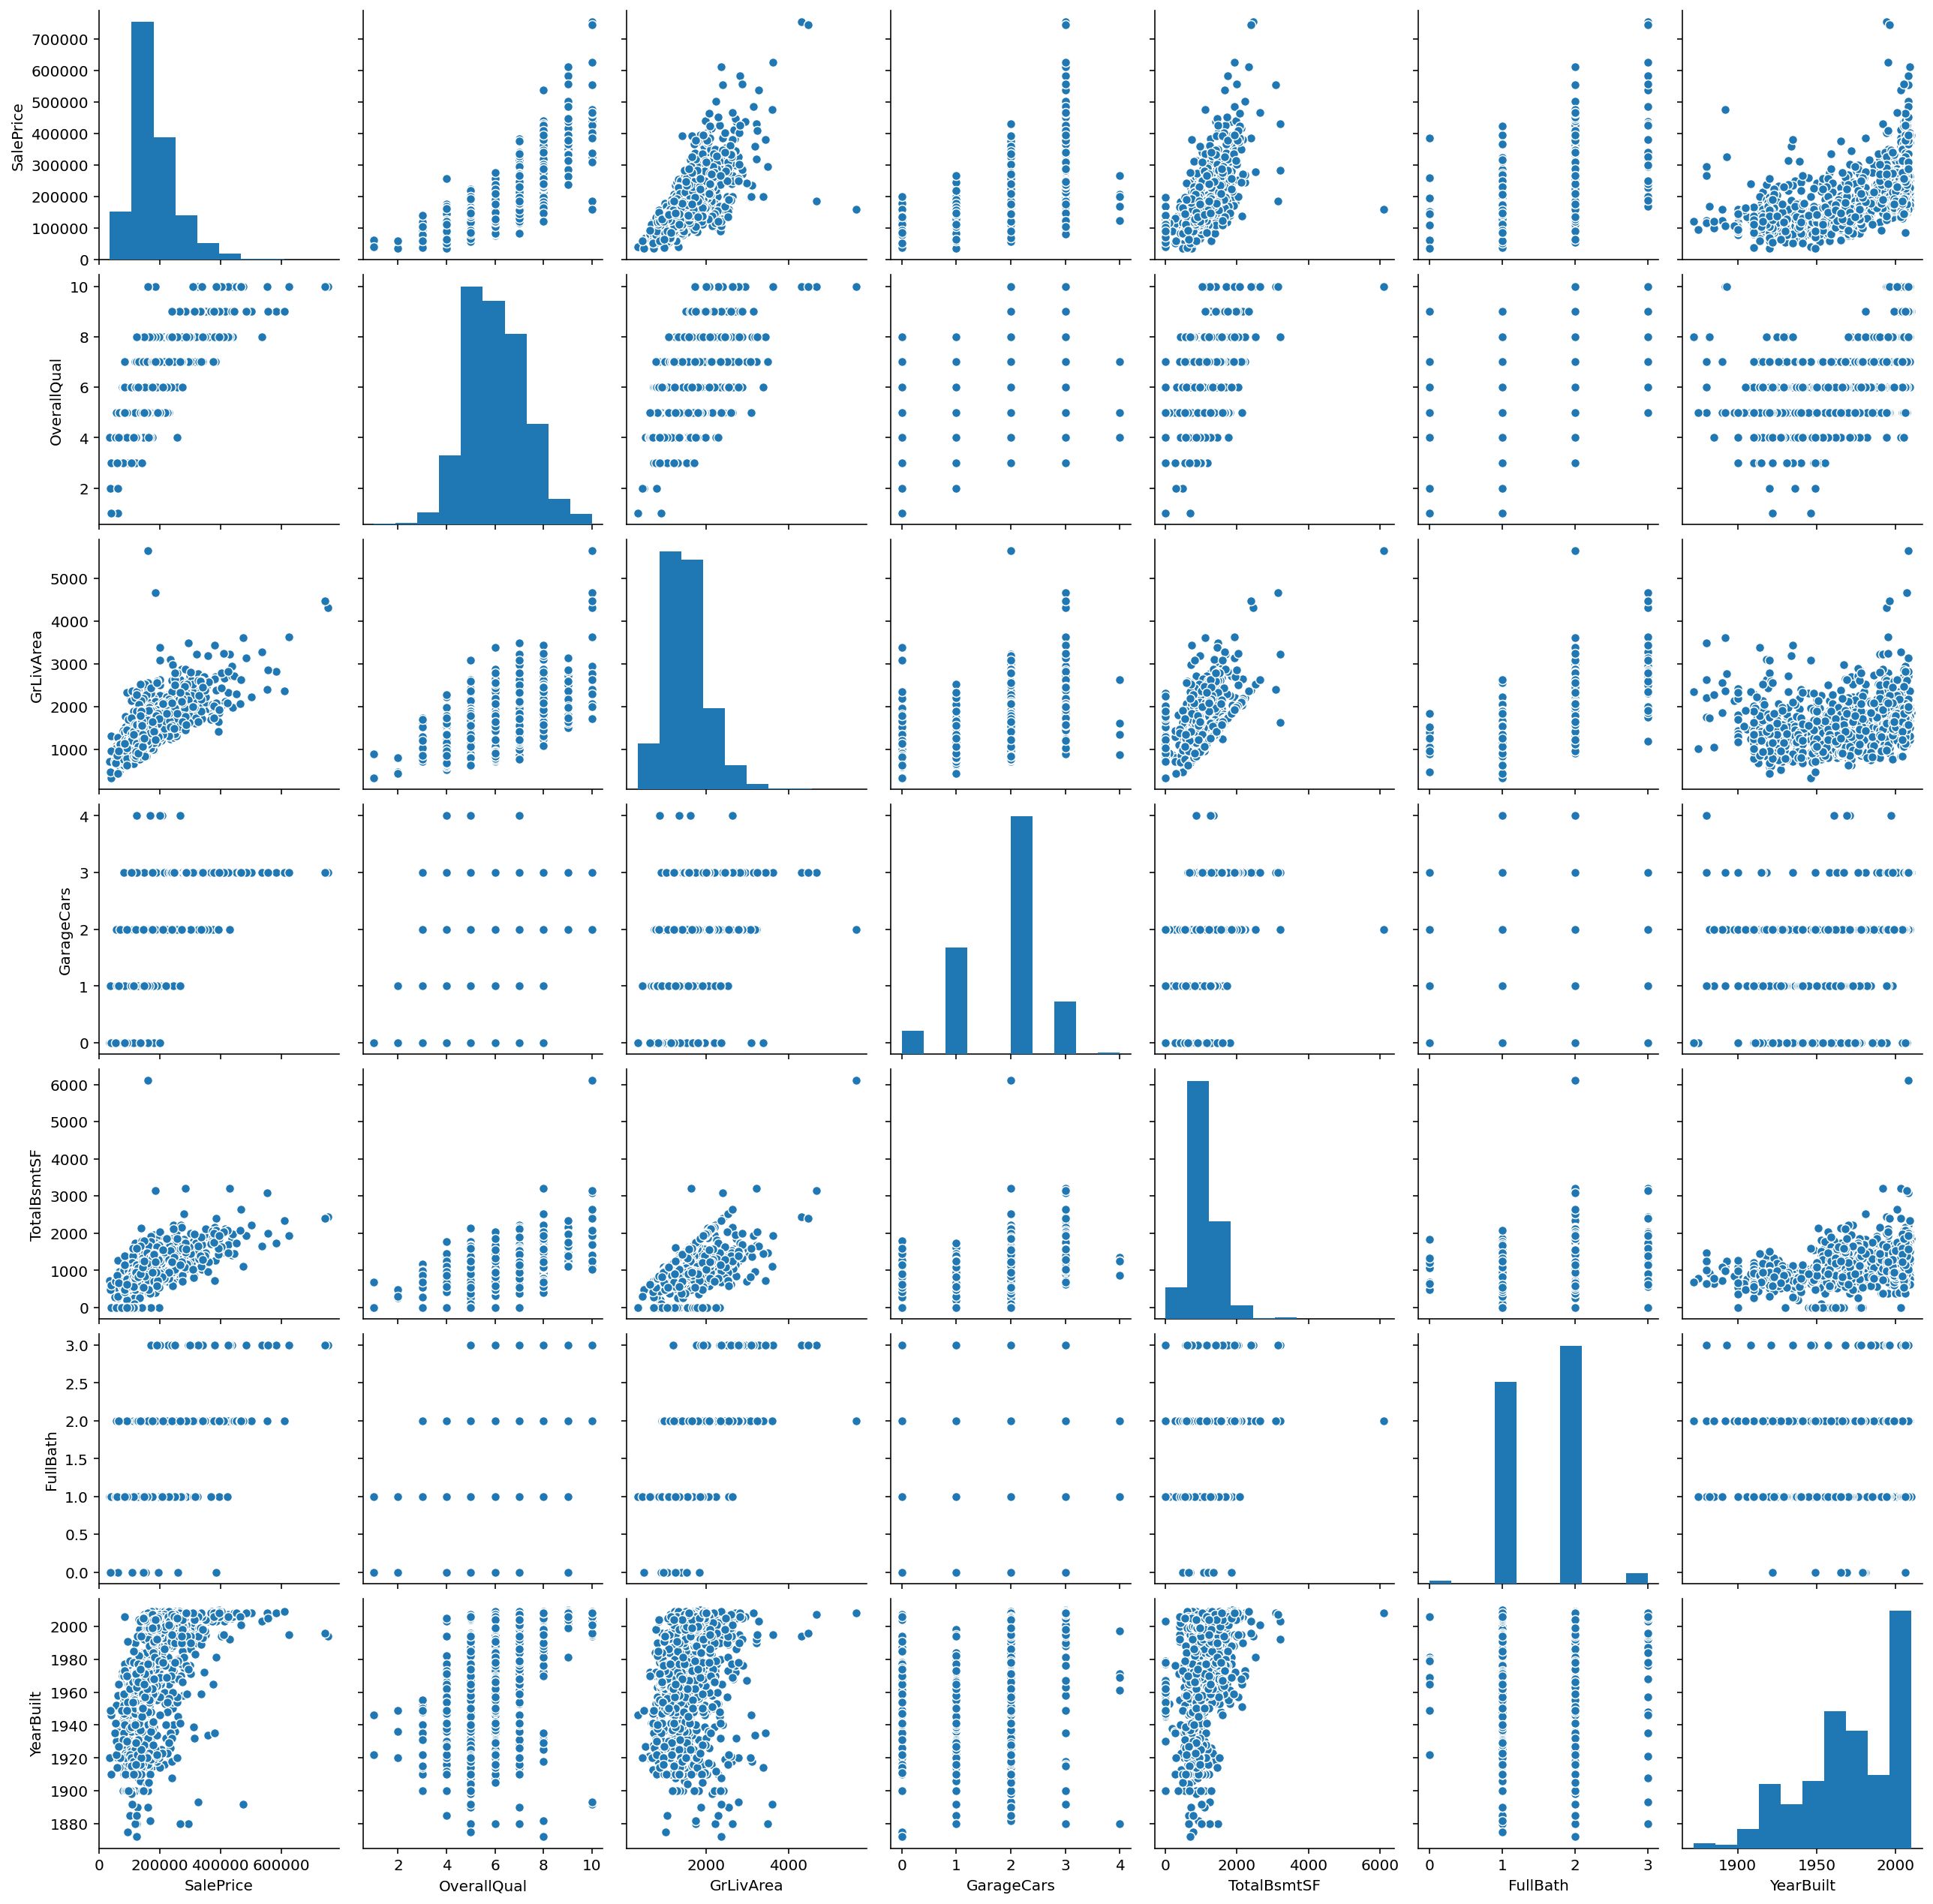

In [32]:
# 산포도 매트릭스 (3개를 제외한 7개 특성만 대상으로)
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 
  'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols])
plt.show();

### 산포도
- 두 변수 사이의 관계 보기

Text(0, 0.5, 'SalePrice')

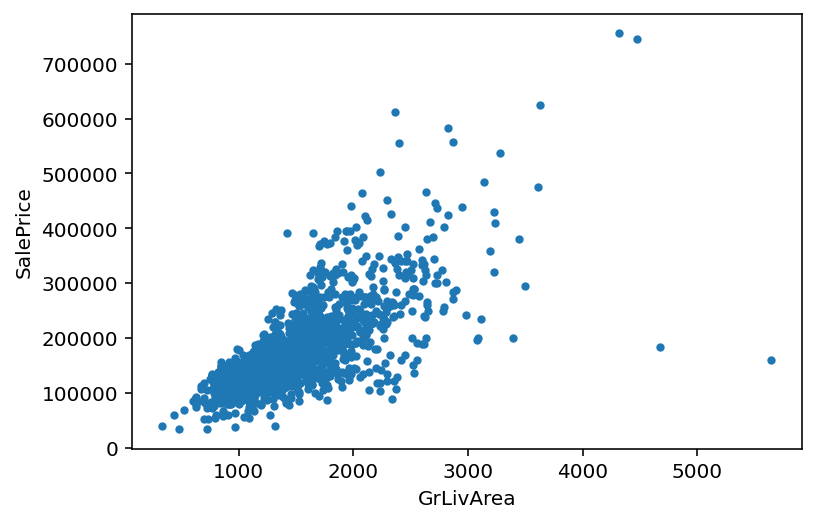

In [37]:
plt.scatter(df['GrLivArea'], df['SalePrice'], s=10)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

Text(0, 0.5, 'SalePrice')

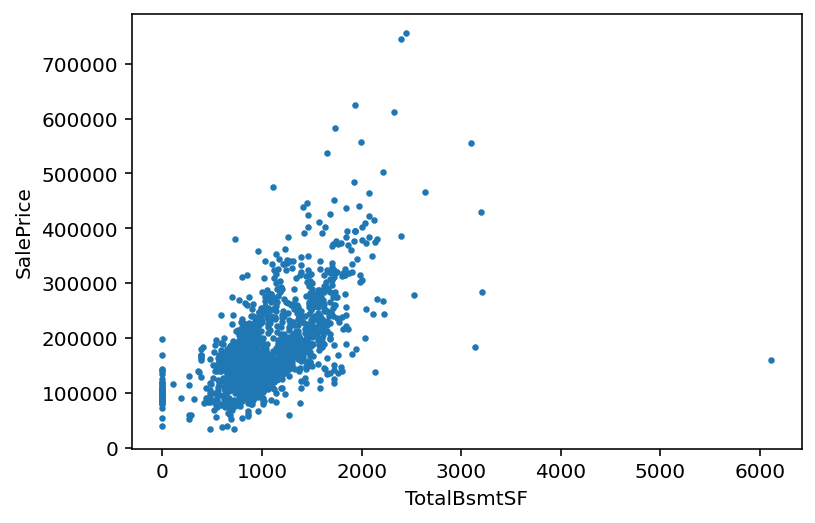

In [38]:
plt.scatter(df['TotalBsmtSF'], df['SalePrice'], s=5)
plt.xlabel("TotalBsmtSF")
plt.ylabel('SalePrice')

- 우측에 이상치가 있는 것으로 보인다
- 면적은 엄청넓은데 가격이 싼 집이있다.

### 카테고리 특성과의 관계
- sns 박스플롯으로 보기

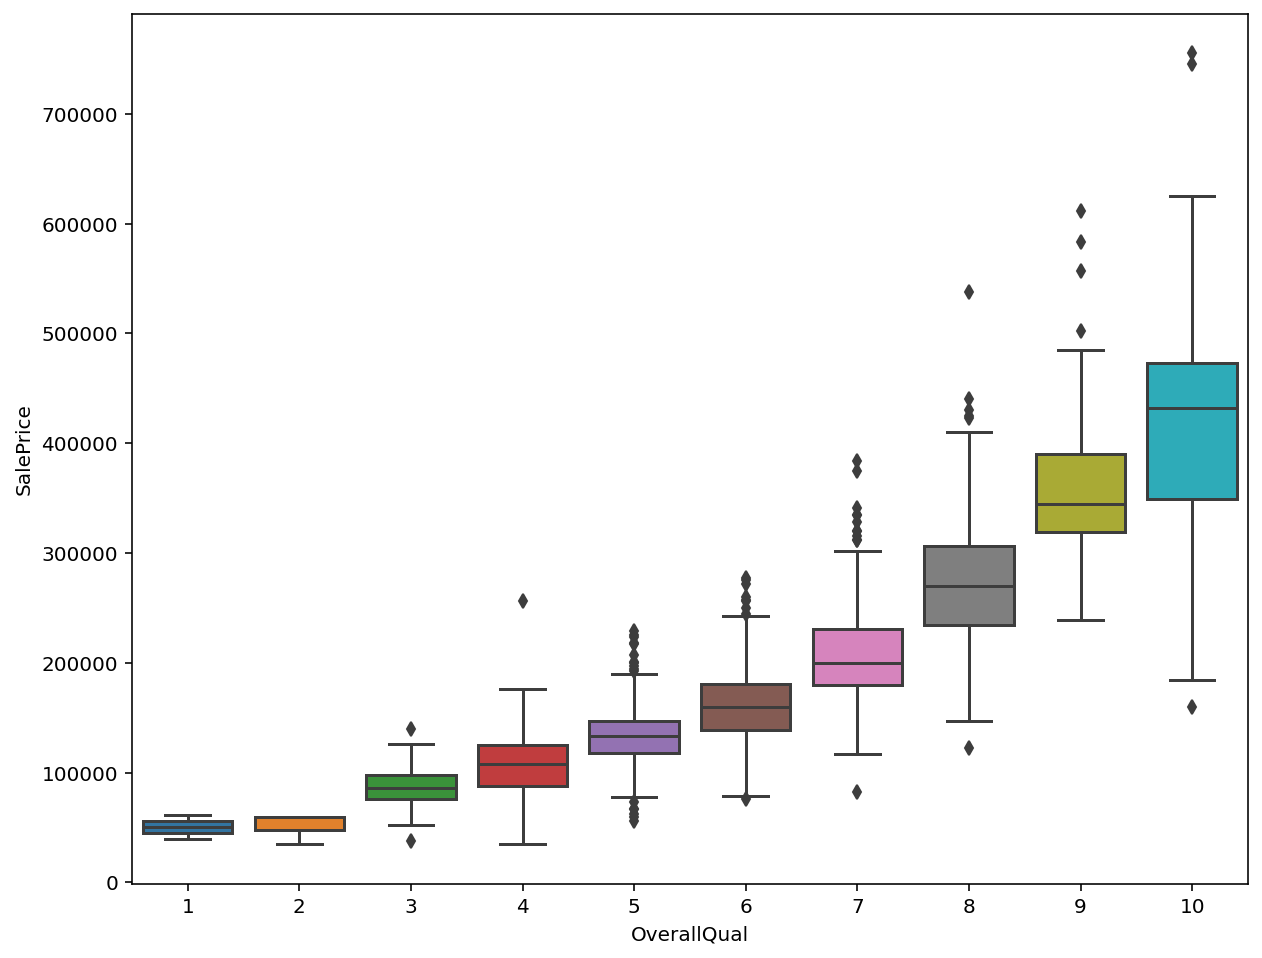

In [40]:
# 카테고리 변수인 OverallQual의 영향 보기
plt.figure(figsize=(10, 8))
sns.boxplot(df['OverallQual'], df['SalePrice'])

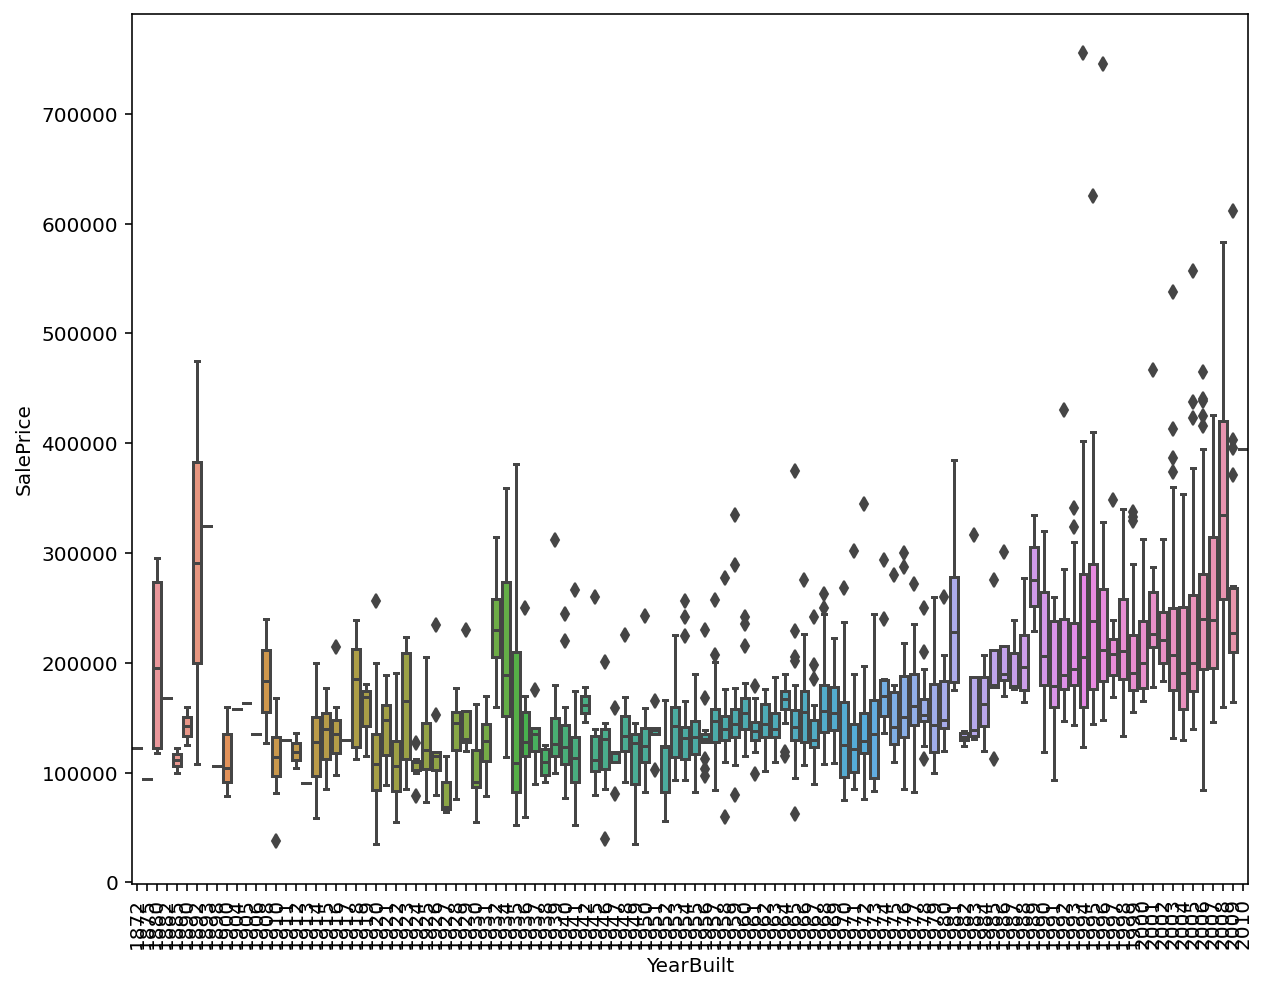

In [41]:
# 카테고리 변수인 YearBuilt의 영향 보기
plt.figure(figsize=(10, 8))
sns.boxplot(df['YearBuilt'], df['SalePrice'])
plt.xticks(rotation=90);plt.show()

# 결측치 처리


In [44]:
# 특성별로 결측치 발생 횟수 보기
#check missing values in the label
missing = df.isnull().sum().sort_values(ascending=False).to_frame()
missing.columns = ['missing_num']
missing[:15]

,missing_num
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [46]:
#전체 샘플 수
df.shape[0]

1460

In [48]:
#결측치가 발생한 비율보기
missing["percent"] = (missing["missing_num"]*100/df.shape[0]).round(2)
missing[:20]

,missing_num,percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


### 결측치 처리 전략
- 'Electrical'는 한 값만 결측이므로 해당 샘플만 제거한다
- 'Electrical' 외에 결측치가 많이 발생한 컬럼은 모두 제외하기로 한다
- (주의!) 컬럼을 제외하기 전에 데이터 중요도를 다시 점검해봐야 한다

- 결측치(x)가 들어 있는 샘플(행)을 삭제하거나, 컬럼 전체를 삭제할 수 있다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-06%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.01.24.png?raw=1" width=330 align='left'>

In [50]:
# 삭제할 특성 (컬럼) 인덱스
missing[missing['missing_num'] > 1].index 
#column에 missing이 1보다 크면 column 통으로 삭제

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType'],
      dtype='object')

In [52]:
#제거하기전 데이터프레임 컬럼 수
df.shape

(1460, 81)

In [53]:
# 결측치 (missing value)가 2개이상 있는 컬럼을 삭제하겠다.
df_missing = df.drop(missing[missing['missing_num'] > 1].index, 1)
df_missing.shape

(1460, 63)

In [54]:
#결측치가 하나있는 경우 그 샘플만 삭제한다
df_missing = df_missing.drop(df.loc[df['Electrical'].isnull()].index)
df_missing.isnull().sum().max() #0이 있는건 체크한다

0

In [55]:
#사본 사용 (df_missing 백업하자)
df2 = df_missing.copy()

# 데이터 변환
## 로그 변환
### 목적 변수의 로그 변환
- 로그변환으로 정규분포에 가까워지는지 확인

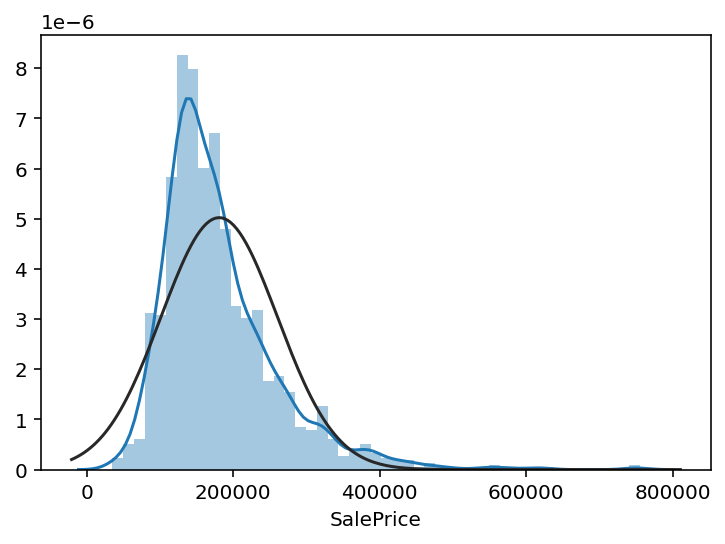

In [56]:
#로그 변환전 데이터
sns.distplot(df2['SalePrice'], fit=norm);

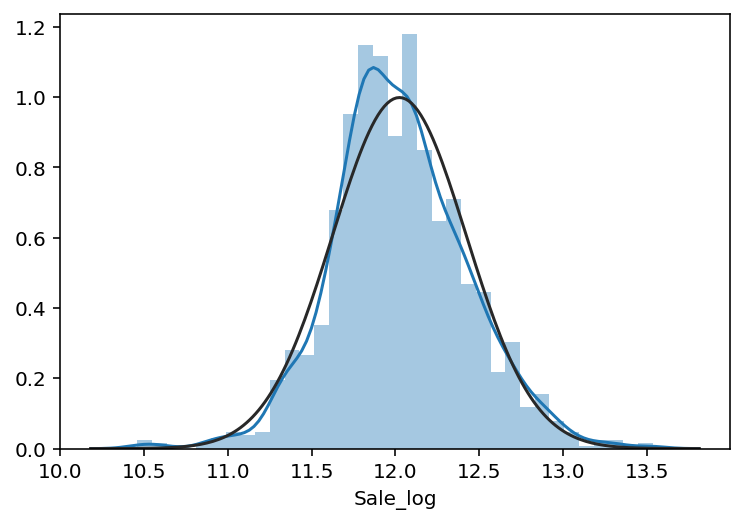

In [58]:
#로그 변환 후 데이터
df2['Sale_log'] = np.log(df2['SalePrice'])
sns.distplot(df2['Sale_log'], fit=norm);

### 입력 특성의 로그 변환

- TotalBsmtSF (지하실 면적) 특성에 대해 알아보겠다

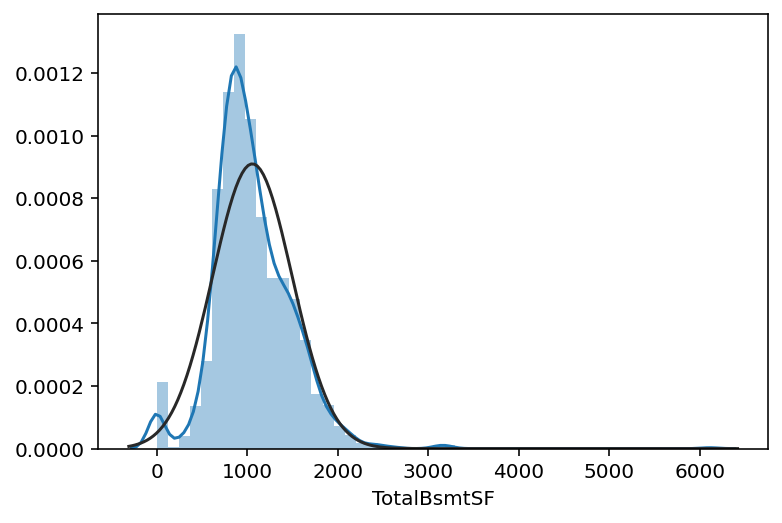

In [59]:
#확률 분포, 가장 가까운 정규분포 함수 비교해 보기.
sns.distplot(df2['TotalBsmtSF'], fit=norm);


- 이 특성에 대해 로그 변환을 해보겠다
- 그런데 특성 값이 0인 경우는 로그 변환을 할 수 없다 (오류 발생)
- 지하실 면적이 0인 경우는 별도로 HasBsmt= 0 (지하실 없음)이라는 카테고리 변수를 새로 생성하고, 값이 양수인 값에 대해서만 로그 변환을 수행

In [64]:
df2['HasBsmt'] = 0
df2.loc[df2['TotalBsmtSF'] > 0, 'HasBsmt'] = 1
df2[:15]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Sale_log,NoBsmt,HasBsmt
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,12.247694,1,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,12.109011,1,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,12.317167,1,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,11.849398,1,1
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,12.429216,1,1
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,700,10,2009,WD,Normal,143000,11.870600,1,1
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,2007,WD,Normal,307000,12.634603,1,1
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,350,11,2009,WD,Normal,200000,12.206073,1,1
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,2008,WD,Abnorml,129900,11.774520,1,1
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,1,2008,WD,Normal,118000,11.678440,1,1


In [65]:
df2['HasBsmt'].value_counts()

1    1422
0      37
Name: HasBsmt, dtype: int64

In [70]:
#양수인 경우만 로그 변환하고 새로운 컬럼에 추가
df2.loc[df2['HasBsmt'] == 1, 'log_TotalBsmtSF'] = np.log(df2['TotalBsmtSF'])
df2[:5]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Sale_log,HasBsmt,log_TotalBsmtSF
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,12.247694,1,6.752270
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,12.109011,1,7.140453
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,12.317167,1,6.824374
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,11.849398,1,6.628041
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,12.429216,1,7.043160


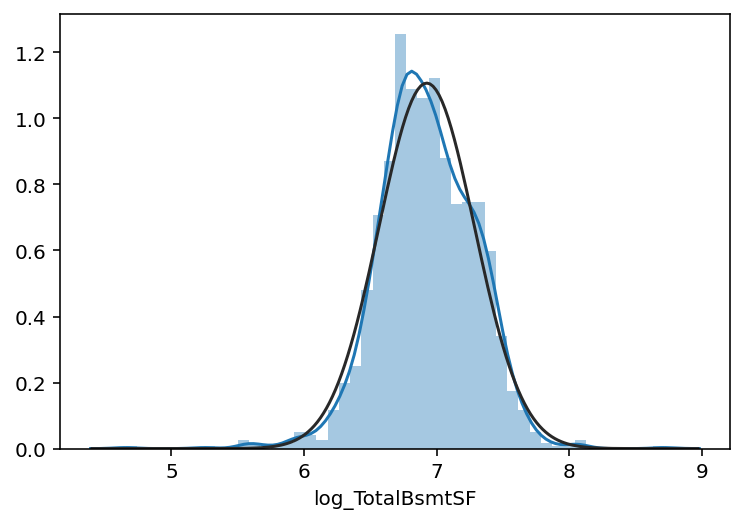

In [72]:
#로그 변환된 특성의 확률 분포 (가까운 정규 분포와 비교)
sns.distplot(df2['log_TotalBsmtSF'], fit=norm)

# 이상치(outlier) 찾기

- 표준편차가 큰 샘플을 찾거나 (예: 6 이상)
- 산포도에서 멀리 떨어진 값을 찾는다
- **또는 이상치 패턴 데이터 이용하여 머신러닝으로 학습시켜서 찾기도 한다**

755000

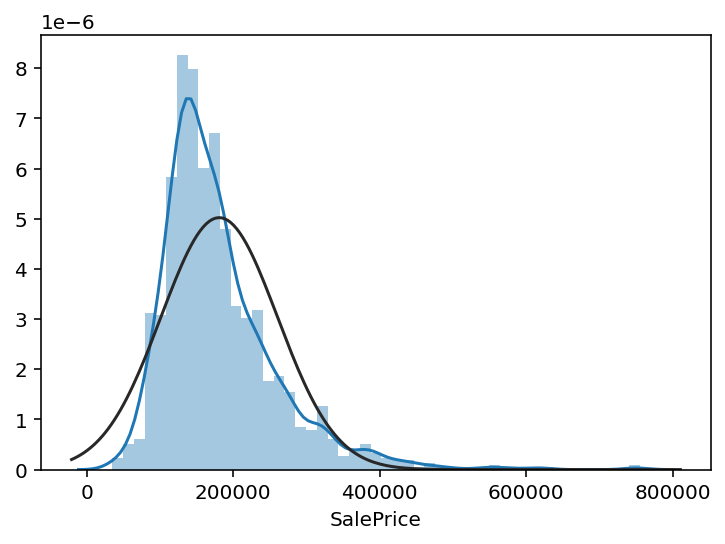

In [74]:
#확률분포에서 찾기 (판매가격)
sns.distplot(df2['SalePrice'], fit=norm);
df2['SalePrice'].max()

In [75]:
# 표준 스케일링
df2["Sale_scaled"] = StandardScaler().fit_transform(df2[["SalePrice"]])
df2[:5]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Sale_log,HasBsmt,log_TotalBsmtSF,Sale_scaled
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2008,WD,Normal,208500,12.247694,1,6.752270,0.347042
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,5,2007,WD,Normal,181500,12.109011,1,7.140453,0.007170
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,9,2008,WD,Normal,223500,12.317167,1,6.824374,0.535860
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,2,2006,WD,Abnorml,140000,11.849398,1,6.628041,-0.515225
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,12,2008,WD,Normal,250000,12.429216,1,7.043160,0.869437


In [76]:
sorted_sales = df2.sort_values(by="Sale_scaled")
#낮은 주택가격
sorted_sales['Sale_scaled'][:20]

495    -1.838208
916    -1.833034
968    -1.800444
533    -1.782821
30     -1.774010
710    -1.622956
1337   -1.616662
705    -1.585192
1325   -1.585192
812    -1.572692
1380   -1.541135
410    -1.522253
636    -1.522253
1100   -1.522253
375    -1.509665
462    -1.492256
1432   -1.465608
874    -1.440432
620    -1.434138
398    -1.434138
Name: Sale_scaled, dtype: float64

In [77]:
sorted_sales['Sale_scaled'][-10:]

798     3.827581
178     4.039522
769     4.494736
440     4.708730
1046    4.728631
803     5.060346
898     5.421919
1169    5.589879
1182    7.100420
691     7.226298
Name: Sale_scaled, dtype: float64

- 이상치에 해당하는 샘플로 691, 1182 등을 선택할 수 있다 (6 시그마 이상)

### 로그를 취한 값을 사용하기
- 주택 가격에 로그를 취한 후 표준 스케일링을 수행한다

In [79]:
df2["Sale_log_scaled"] = StandardScaler().fit_transform(df2[["Sale_log"]])
df2[:5]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Sale_log,HasBsmt,log_TotalBsmtSF,Sale_scaled,Sale_log_scaled
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,2008,WD,Normal,208500,12.247694,1,6.752270,0.347042,0.559884
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,5,2007,WD,Normal,181500,12.109011,1,7.140453,0.007170,0.212700
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,9,2008,WD,Normal,223500,12.317167,1,6.824374,0.535860,0.733803
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2,2006,WD,Abnorml,140000,11.849398,1,6.628041,-0.515225,-0.437224
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,12,2008,WD,Normal,250000,12.429216,1,7.043160,0.869437,1.014311


In [81]:
sorted_sales_scaled = df2.sort_values(by="Sale_log_scaled")
sorted_sales_scaled["Sale_log_scaled"][:10]

495    -3.914879
916    -3.885569
968    -3.708435
533    -3.617627
30     -3.573429
710    -2.916619
1337   -2.892662
705    -2.776203
1325   -2.776203
812    -2.731407
Name: Sale_log_scaled, dtype: float64

In [82]:
sorted_sales_scaled["Sale_log_scaled"][-10:]

798     2.673305
178     2.758738
769     2.932935
440     3.010815
1046    3.017936
803     3.133744
898     3.254158
1169    3.308182
1182    3.747866
691     3.781245
Name: Sale_log_scaled, dtype: float64

- 로그를 취하면 편차가 줄어든다
 - 이상치를 표준편차 +3 이상 또는 -3 이하로 선택할 수 있다
 - 고가 주택 뿐 아니라 저가 주택의 이상치도 찾을 수 있다

### 산포도로 이상치 찾기 (Scatter Plot)

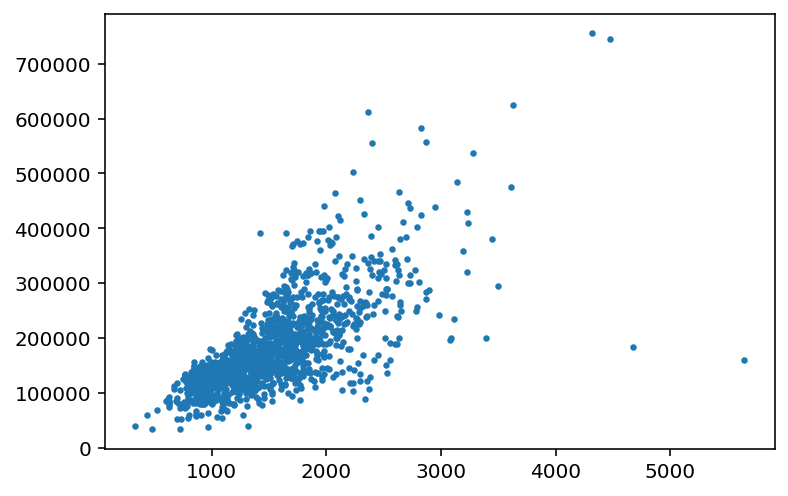

In [83]:
plt.scatter(df2['GrLivArea'], df2['SalePrice'], s=5)

- 우하측의 두 점은 트렌드를 따르지 않는 값으로 이상치로 보고 분석에서 삭제한다
- GrLivArea 값이 가장 큰 두 개의 샘플을 제거
- 이상치를 제거하는 이유는 분석 모델을 더 잘 만들기 위해서이다 (혼란스런 정보, 노이지를 삭제하는 것임
- 특수한 케이스/경우를 빼는게 좋다. 어차피 학습은 확실한 데이터로 하는게 좋다.

In [95]:
a = df2.sort_values(by="GrLivArea", ascending=False)[:2]
a["GrLivArea"]

1298    5642
523     4676
Name: GrLivArea, dtype: int64

In [89]:
#삭제한 샘플의 인덱스
del_index = df2.sort_values(by="GrLivArea", ascending=False)[:2].index
del_index

Int64Index([1298, 523], dtype='int64')

In [102]:
#이상치 2개를 제거한 데이터의 크기
df3 = df2.drop(del_index)
print(df2.shape)
print(df3.shape)

(1459, 68)
(1457, 68)


In [103]:
df3

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Sale_log,HasBsmt,log_TotalBsmtSF,Sale_scaled,Sale_log_scaled
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,2008,WD,Normal,208500,12.247694,1,6.752270,0.347042,0.559884
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,5,2007,WD,Normal,181500,12.109011,1,7.140453,0.007170,0.212700
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,9,2008,WD,Normal,223500,12.317167,1,6.824374,0.535860,0.733803
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2,2006,WD,Abnorml,140000,11.849398,1,6.628041,-0.515225,-0.437224
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,12,2008,WD,Normal,250000,12.429216,1,7.043160,0.869437,1.014311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,8,2007,WD,Normal,175000,12.072541,1,6.859615,-0.074651,0.121400
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,2010,WD,Normal,210000,12.254863,1,7.340836,0.365924,0.577830
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,5,2010,WD,Normal,266500,12.493130,1,7.049255,1.077137,1.174314
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,4,2010,WD,Normal,142125,11.864462,1,6.982863,-0.488476,-0.399511


In [104]:
df3.SaleCondition.value_counts()

Normal     1197
Partial     123
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [107]:
df_Sale_Condition = pd.get_dummies(df["SaleCondition"], "SaleCondition")
df_Sale_Condition.head()

,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0
